# Shriddha Vishwakarma
# The Spark Foundation - GRIP Mar 21
### Task 2 - Predict the optimum number of clusters and represent it visually using Unsupervised ML

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets

#### Loading the Iris dataset

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(data = iris.data, columns= iris.feature_names)

In [3]:
data.head() #top five data points

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### Plotting pairwise graphs between the columns

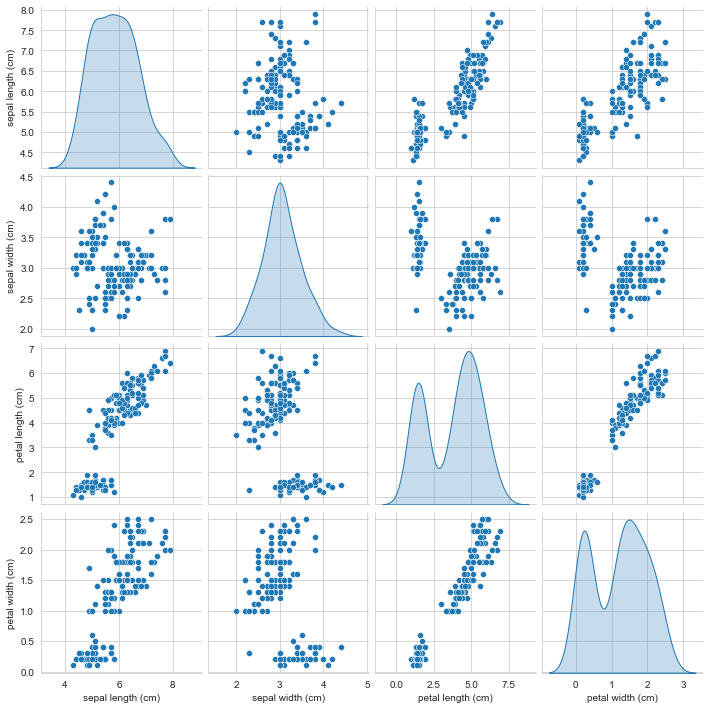

In [5]:
sns.set_style('whitegrid')
sns.pairplot(data,diag_kind='kde') 

### Elbow method to determine the optimal no. of clusters (k)

In [6]:
x = data.iloc[:,0:4].values 

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = [] #within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

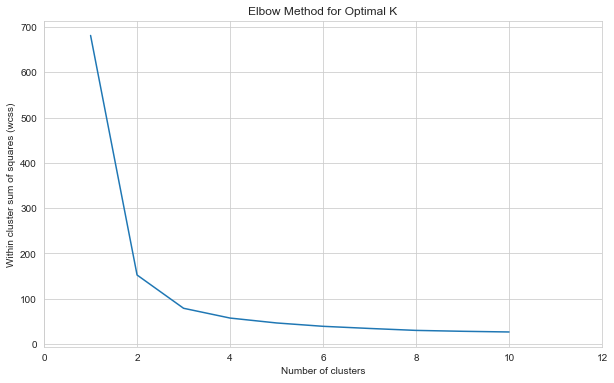

In [9]:
# Plotting the results and observing 'the elbow'

plt.figure(figsize=(10,6))
sns.lineplot(x= range(1,11), y= wcss)
plt.xlim(0,12)

plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares (wcss)')
plt.title('Elbow Method for Optimal K')

The elbow, or the point after which the wcss doesn't decrease significantly, appears right above where number of clusters is 3.

**So we choose the number of clusters or k to be 3.**

### Creating the clusters- Applying kmeans to the dataset

In [10]:
kmeans = KMeans(n_clusters= 3, random_state=0)

y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters 

Text(0, 0.5, 'sepal width')

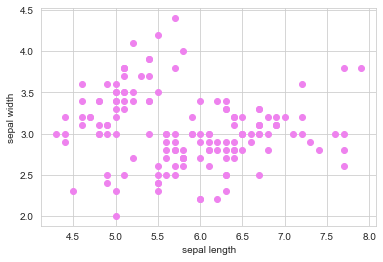

In [11]:
# Plotting the Sepal width against Sepal length
plt.scatter(x[:,0],x[:,1], c= 'violet')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

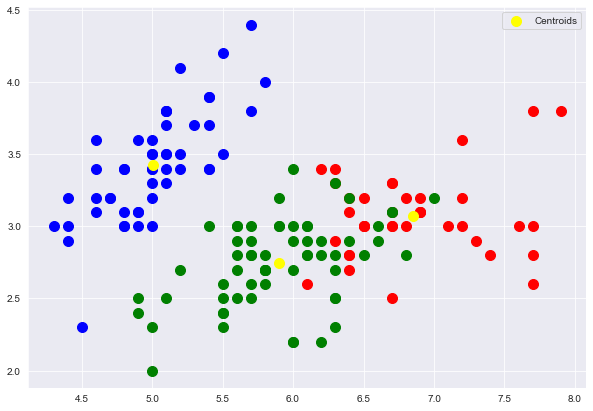

In [12]:
# Visualising clusters for the first two columns

sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red') # point lies in 1st cluster
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue') # point lies in 2nd cluster
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green') # point lies in 3rd cluster

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Text(0, 0.5, 'petal width')

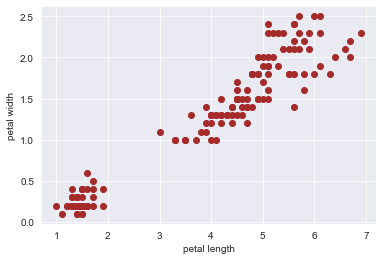

In [13]:
#Plotting petal length against petal width
plt.scatter(x = x[:,2], y = x[:,3], c ='brown')
plt.xlabel('petal length')
plt.ylabel('petal width')

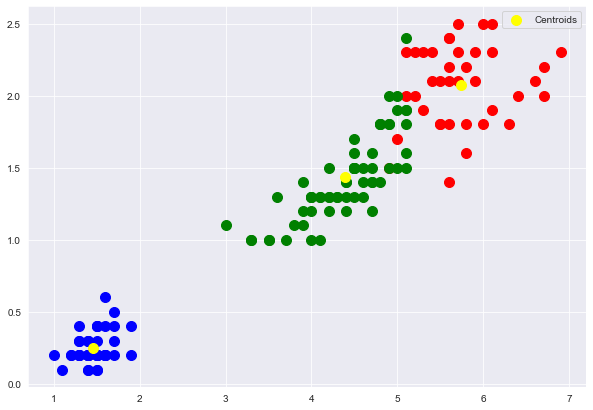

In [14]:
# Visualising clusters for the last two columns
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red') # point lies in 1st cluster
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue') # point lies in 2nd cluster
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green') # point lies in 3rd cluster

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Thank you!